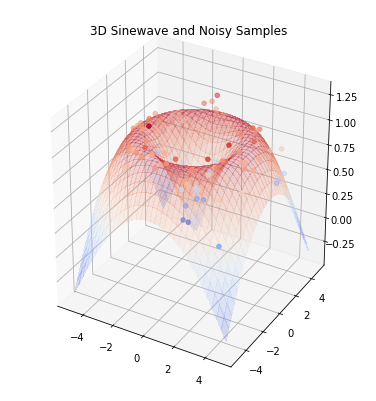

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gaussian_processes_util import plot_gp_2D

noise_2D = 0.1

rx, ry = np.arange(-5, 5, 0.3), np.arange(-5, 5, 0.3)
gx, gy = np.meshgrid(rx, rx)

X_2D = np.c_[gx.ravel(), gy.ravel()]
Y_2D_truth = np.sin(0.5 * np.linalg.norm(X_2D, axis=1))

X_2D_train = np.random.uniform(-4, 4, (100, 2))
Y_2D_train = np.sin(0.5 * np.linalg.norm(X_2D_train, axis=1)) + \
             noise_2D * np.random.randn(len(X_2D_train))
sinewave1 = pd.DataFrame(X_2D_train,  columns=['x1', 'x2'])
sinewave2 = pd.DataFrame(Y_2D_train,  columns=['y'])
sinewave =pd.concat([sinewave1, sinewave2], axis=1)

plt.figure(figsize=(14,7))
plot_gp_2D(gx, gy, Y_2D_truth, X_2D_train, Y_2D_train, 
           f'3D Sinewave and Noisy Samples', 1)

In [50]:
import sys
sys.path.insert(0, '\\\\newwinsrc\\sasgen\\dev\\mva-vb023\\GTKWX6ND\\misc\\python') # location of src  
import swat as sw
s = sw.CAS('rdcgrd327.unx.sas.com', 29640, nworkers=2)
s.sessionprop.setsessopt(caslib='CASUSER',timeout=31535000)

NOTE: 'CASUSER(yeliu1)' is now the active caslib.


+ Elapsed: 0.00603s, user: 0.00426s, sys: 0.00847s, mem: 1.13mb

In [60]:

if s.tableexists('sinewave').exists:
    s.CASTable('sinewave').droptable()

dataset = s.upload_frame(sinewave, 
                         importoptions=dict(vars=[dict(type='double'),
                                                  dict(type='double'),
                                                  dict(type='double')
                                                  ]),
                          casout=dict(name='sinewave', promote=True))



NOTE: Cloud Analytic Services dropped table sinewave from caslib CASUSER(yeliu1).
NOTE: Cloud Analytic Services made the uploaded file available as table SINEWAVE in caslib CASUSER(yeliu1).
NOTE: The table SINEWAVE has been created in caslib CASUSER(yeliu1) from binary data uploaded to Cloud Analytic Services.


In [55]:

s.loadactionset(actionset="nonParametricBayes")
s.gpreg(
      table={"name":"sinewave"},
      inputs={"x1","x2"},
      target="y", 
      seed=1234, 
      nInducingPoints=7,
      fixInducingPoints=False,
      kernel="RBF",
      partbyfrac={"valid":0, "test":0, "seed":1235},
      nloOpts={"algorithm":"ADAM",
            "optmlOpt":{"maxIters":91},
            "sgdOpt":{"learningRate":0.15,
                      "momentum":0.8,
                      "adaptiveRate":True,
                      "adaptiveDecay":0.9,
                      "miniBatchSize":100 
                   },
            "printOpt":{"printFreq":10}
           },   
      output={"casout":{"name":"GpReg_Pred", "replace":True}, "copyvars":"ALL"},
      outInducingPoints={"name":"GpReg_inducing", "replace":True},
      outVariationalCov={"name":"GpReg_S", "replace":True},
      saveState={"name":"gpregStore", "replace":True}
)

NOTE: Added action set 'nonParametricBayes'.
NOTE: Action reset useLocking to TRUE.
NOTE: Beginning optimization of Gaussian Process Regression model...
NOTE: Optimization complete.


,Progress,Objective,Loss
0,1.0,194.363441,194.363441
1,11.0,142.360500,142.360500
2,21.0,134.920512,134.920512
3,31.0,130.592329,130.592329
4,41.0,128.874359,128.874359
5,51.0,129.419863,129.419863
6,61.0,129.766238,129.766238
7,71.0,128.714885,128.714885
8,81.0,129.481927,129.481927
9,91.0,128.360887,128.360887


In [56]:

s.gpreg(
      table={"name":"sinewave"},
      inputs={"x1","x2"},
      target="y", 
      seed=1234, 
      nInducingPoints=25,
      fixInducingPoints=True,
      kernel="RBF",
      partbyfrac={"valid":0, "test":0, "seed":1235},
      nloOpts={"algorithm":"ADAM",
            "optmlOpt":{"maxIters":1},
            "sgdOpt":{"learningRate":0.15,
                      "momentum":0.8,
                      "adaptiveRate":True,
                      "adaptiveDecay":0.9,
                      "miniBatchSize":100 
                   },
            "printOpt":{"printFreq":1}
           },   
      output={"casout":{"name":"GpReg_Pred1", "replace":True}, "copyvars":"ALL"},
      outInducingPoints={"name":"GpReg_inducing1", "replace":True},
      outVariationalCov={"name":"GpReg_S1", "replace":True},
      saveState={"name":"gpregStore1", "replace":True}
)


NOTE: Action reset useLocking to TRUE.
NOTE: Beginning optimization of Gaussian Process Regression model...
NOTE: Optimization complete.


[OptIterHistory]

    Progress     Objective          Loss
 0       1.0  16072.850279  16072.850279

[ConvergenceStatus]

                                               Reason
 0  The optimization has performed the desired num...

[OptParameters]

                          Option     Value
 0                     Algorithm      ADAM
 1   L1 Regularization Parameter         0
 2   L2 Regularization Parameter         0
 3          Clip Weight Max Norm         0
 4                Max Iterations         1
 5      Max Function Evaluations     1e+15
 6                      Max Time         0
 7          Function Convergence     1e-05
 8   Function Convergence Window         1
 9          Gradient Convergence     1e-05
 10                Learning Rate      0.15
 11                        beta1       0.8
 12                Adaptive Rate      TRUE
 13              Mini-Batch Size       100
 14      Communication Frequency         0
 15                        beta2       0.9
 16                  Use Locking      TRUE
 17               Annealing Rate     1e-06

[VarStats]

 Variable Statistics
 
   Variable    Role      Mean    StdDev
 0       x1   Input -0.202327  2.466274
 1       x2   Input  0.153622  2.342866
 2        y  Target  0.850809  0.211459

[NObs]

 Number of Observations
 
         RowId                               Description  Value
 0       NREAD               Number of Observations Read    100
 1       NUSED               Number of Observations Used    100
 2  NTRAINUSED  Number of Observations Used for Training    100
 3   NTESTUSED   Number of Observations Used for Testing      0

[ModelInfo]

 Model Information
 
                             RowId  \
 0                            SEED   
 1                 NINDUCINGPOINTS   
 2                          KERNEL   
 3                             ARD   
 4  FIXKERNELANDNOISEPARMFIRSTITER   
 5               FIXINDUCINGPOINTS   
 6                   USESIMPLEINIT   
 7                  JITTERMAXITERS   
 
                                          Description  Value  nValue  
 0  Seed for Random Initialization for Clustering ...   1234  1234.0  
 1                          Number of inducing points     25    25.0  
 2                                        Kernel Type    RBF     NaN  
 3                  Automatic Relevance Determination  FALSE     NaN  
 4       Fix Kernel Parameters in the First Iteration  FALSE     NaN  
 5                Fix Inducing Points in Optimization   TRUE     NaN  
 6                          Use Simple Initialization   TRUE     NaN  
 7  Maximum Number of Iterations for Jitter Choles...     10    10.0  

[ParameterEstimates]

 Parameter Estimates
 
   ParameterType                   ParameterName  ParameterValue
 0        Kernel                        Variance        1.114867
 1        Kernel  Inverse square of length scale        1.114867
 2         Noise                        Variance        1.114867

[OutputCasTables]

             casLib             Name Label  Rows  Columns  \
 0  CASUSER(yeliu1)      GpReg_Pred1         100        7   
 1  CASUSER(yeliu1)  GpReg_inducing1          25        4   
 2  CASUSER(yeliu1)         GpReg_S1         625        1   
 
                                             casTable  
 0  CASTable('GpReg_Pred1', caslib='CASUSER(yeliu1)')  
 1  CASTable('GpReg_inducing1', caslib='CASUSER(ye...  
 2     CASTable('GpReg_S1', caslib='CASUSER(yeliu1)')  

+ Elapsed: 0.651s, user: 1s, sys: 0.691s, mem: 251mb

In [57]:
sinewave_test = pd.DataFrame(X_2D,  columns=['x1', 'x2'])
if s.tableexists('sinewave_test').exists:
    s.CASTable('sinewave_test').droptable()

dataset = s.upload_frame(sinewave_test, 
                         importoptions=dict(vars=[dict(type='double'),
                                                  dict(type='double')
                                                
                                                  ]),
                          casout=dict(name='sinewave_test', promote=True))

NOTE: Cloud Analytic Services dropped table sinewave_test from caslib CASUSER(yeliu1).
NOTE: Cloud Analytic Services made the uploaded file available as table SINEWAVE_TEST in caslib CASUSER(yeliu1).
NOTE: The table SINEWAVE_TEST has been created in caslib CASUSER(yeliu1) from binary data uploaded to Cloud Analytic Services.


In [58]:
if s.tableexists('test_pred').exists:
    s.CASTable('test_pred').droptable()

if s.tableexists('test_pred1').exists:
    s.CASTable('test_pred1').droptable()


s.loadactionset('aStore')
s.score(
table='sinewave_test',
out='test_pred',
rstore='gpregStore',
)
pred = s.CASTable("test_pred").to_frame() 

s.loadactionset('aStore')
s.score(
table='sinewave_test',
out='test_pred1',
rstore='gpregStore1',
)
pred1 = s.CASTable("test_pred1").to_frame() 


NOTE: Added action set 'aStore'.
NOTE: Added action set 'aStore'.


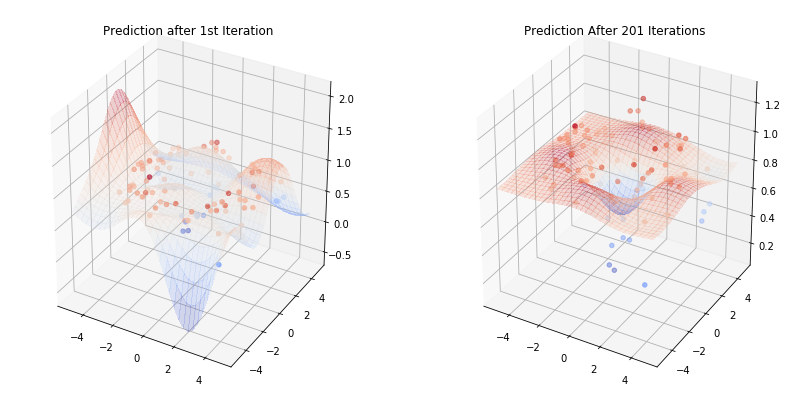

In [59]:
mu = pred['P_yMEAN'].values
mu1 = pred1['P_yMEAN'].values

plt.figure(figsize=(14,7))
plot_gp_2D(gx, gy, mu1, X_2D_train, Y_2D_train, 
           f'Prediction after 1st Iteration', 1)

plot_gp_2D(gx, gy, mu, X_2D_train, Y_2D_train, 
           f'Prediction After 201 Iterations', 2)